# Analytics Raw

Objetivos:
* Ler CSV com sucesso
* Realizar Limpeza
* Análise de dados

## Ler CSV

### Importando bibliotecas e definindo configurações.

In [235]:
import pandas as pd

# Configuração para visualizar todas as colunas no Jupyter
pd.set_option('display.max_columns', None)

caminho_csv_completo = 'games.csv'

print("Bibliotecas importadas e configurações definidas.")

Bibliotecas importadas e configurações definidas.


### Importando o CSV para o Pandas

In [236]:
print("Carregando o CSV para o Pandas...")

colunas_corretas = [
    'AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 
    'Required age', 'Price', 'Discount', 'DLC count', 'About the game', 
    'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 
    'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 
    'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 
    'Score rank', 'Achievements', 'Recommendations', 'Notes', 
    'Average playtime forever', 'Average playtime two weeks', 
    'Median playtime forever', 'Median playtime two weeks', 
    'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 
    'Screenshots', 'Movies'
]

# header=0: Ignora a primeira linha do arquivo (que está bugada)
# names=colunas_corretas: Usa os nossos nomes que estão certos
df = pd.read_csv(
    caminho_csv_completo, 
    low_memory=False, 
    header=0, 
    names=colunas_corretas
)
print("CSV carregado com sucesso")

Carregando o CSV para o Pandas...
CSV carregado com sucesso


### Informações básicas

In [237]:
print("---------------------------------------")
print("Total de jogos na base:", len(df))
print("---------------------------------------")
print("Total de colunas:", len(df.columns)) 
print("---------------------------------------")

---------------------------------------
Total de jogos na base: 122611
---------------------------------------
Total de colunas: 40
---------------------------------------


In [238]:

df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
Discount                        int64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements

### Visualização das primeiras linhas da tabela

In [239]:
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,0,NaN,[],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://shared.akamai.steamstatic.com/store_it...,NaN
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0 - 20000,0,0,5.24,65,0,"Springtime, April: when the cherry trees come ...",['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,http://mangagamer.org/supipara,http://mangagamer.com,support@mangagamer.com,True,False,False,0,NaN,0,252,3,NaN,0,231,NaN,8,0,8,0,minori,MangaGamer,"Single-player,Steam Trading Cards,Steam Cloud,...",Adventure,"Adventure,Visual Novel,Anime,Cute",https://shared.akamai.steamstatic.com/store_it...,NaN
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0 - 20000,0,0,4.99,0,0,"Immerse yourself in the most beloved, mystical...","['English', 'French', 'German', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.facebook.com/8FloorGames/,https://www.facebook.com/8FloorGames,support@8floor.net,True,True,False,0,NaN,0,21,3,NaN,0,0,NaN,0,0,0,0,Somer Games,8floor,"Single-player,Family Sharing",Casual,"Casual,Card Game,Solitaire,Puzzle,Hidden Objec...",https://shared.akamai.steamstatic.com/store_it...,NaN
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0 - 20000,1,0,8.99,0,1,"synopsis 'Hello, I'm Hiyoro, a new YouTuber!' ...",['Korean'],['Korean'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,yujingamesc@gmail.com,True,False,False,0,NaN,0,0,0,NaN,19,0,The game includes the following elements. 1. G...,0,0,0,0,유진게임즈,유진게임즈,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN
4,3631080,Maze Quest VR,"Apr 24, 2025",0 - 20000,0,0,4.99,0,0,Its not just a Maze; its a Quest! Enter the ca...,['English'],['English'],NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.realityexpanded.com/books-games,https://www.realityexpanded.com,support@realityexpanded.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Reality Expanded LLC,Reality Expanded LLC,"Single-player,VR Only,Steam Leaderboards,Famil...","Action,Early Access",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN


## Limpeza

### Renomeando colunas

In [240]:
mapa_colunas = {
    'AppID': 'id_jogo',
    'Name': 'nome_jogo',
    'Release date': 'data_lancamento',
    'Estimated owners': 'qtde_donos',
    'Peak CCU': 'pico_usuarios',
    'Required age': 'idade_minima',
    'Price': 'preco',
    'Discount': 'preco_desconto',
    'DLC count': 'qtde_dlcs', 
    'About the game': 'descricao',
    'Supported languages': 'idiomas_suportados',
    'Full audio languages': 'idiomas_audio_suportados',
    'Reviews': 'avaliacao',
    'Header image': 'url_imagem_capa',
    'Website': 'website',
    'Support url': 'url_suporte',
    'Support email': 'email_suporte',
    'Windows': 'windows',
    'Mac': 'mac',
    'Linux': 'linux',
    'Metacritic score': 'nota_metacritic',
    'Metacritic url': "url_metacritic",
    'User score': 'nota_usuario',
    'Positive': 'avaliacoes_positivas',
    'Negative': 'avaliacoes_negativas',
    'Score rank': 'recomendacoes_usuario',
    'Achievements': 'qtde_conquistas',
    'Recommendations': 'recomendacoes',
    'Notes': 'observacoes',
    'Average playtime forever': 'media_tempo_de_jogo_desde_sempre',
    'Average playtime two weeks': 'media_tempo_de_jogo_desde_duas_semanas',
    'Median playtime forever': 'mediana_tempo_de_jogo_desde_sempre',
    'Median playtime two weeks': 'mediana_tempo_de_jogo_desde_duas_semanas',
    'Developers': 'desenvolvedores',
    'Publishers': 'publicadoras',
    'Categories': 'categorias',
    'Genres': 'generos',
    'Tags': 'tags',
    'Screenshots': 'urls_screenshot',
    'Movies': 'filmes'
}

df = df.rename(columns=mapa_colunas)

### Presença de NaN

Colunas com NaNs podem trazer problemas para o uso de algumas funções. Além disso, colunas com muitos NaNs não têm muitos dados disponíveis para serem trabalhados.

id_jogo                                          0
nome_jogo                                        1
data_lancamento                                  0
qtde_donos                                       0
pico_usuarios                                    0
idade_minima                                     0
preco                                            0
preco_desconto                                   0
qtde_dlcs                                        0
descricao                                     8449
idiomas_suportados                               0
idiomas_audio_suportados                         0
avaliacao                                   110541
url_imagem_capa                                 81
website                                      72935
url_suporte                                  68469
email_suporte                                22263
windows                                          0
mac                                              0
linux                          

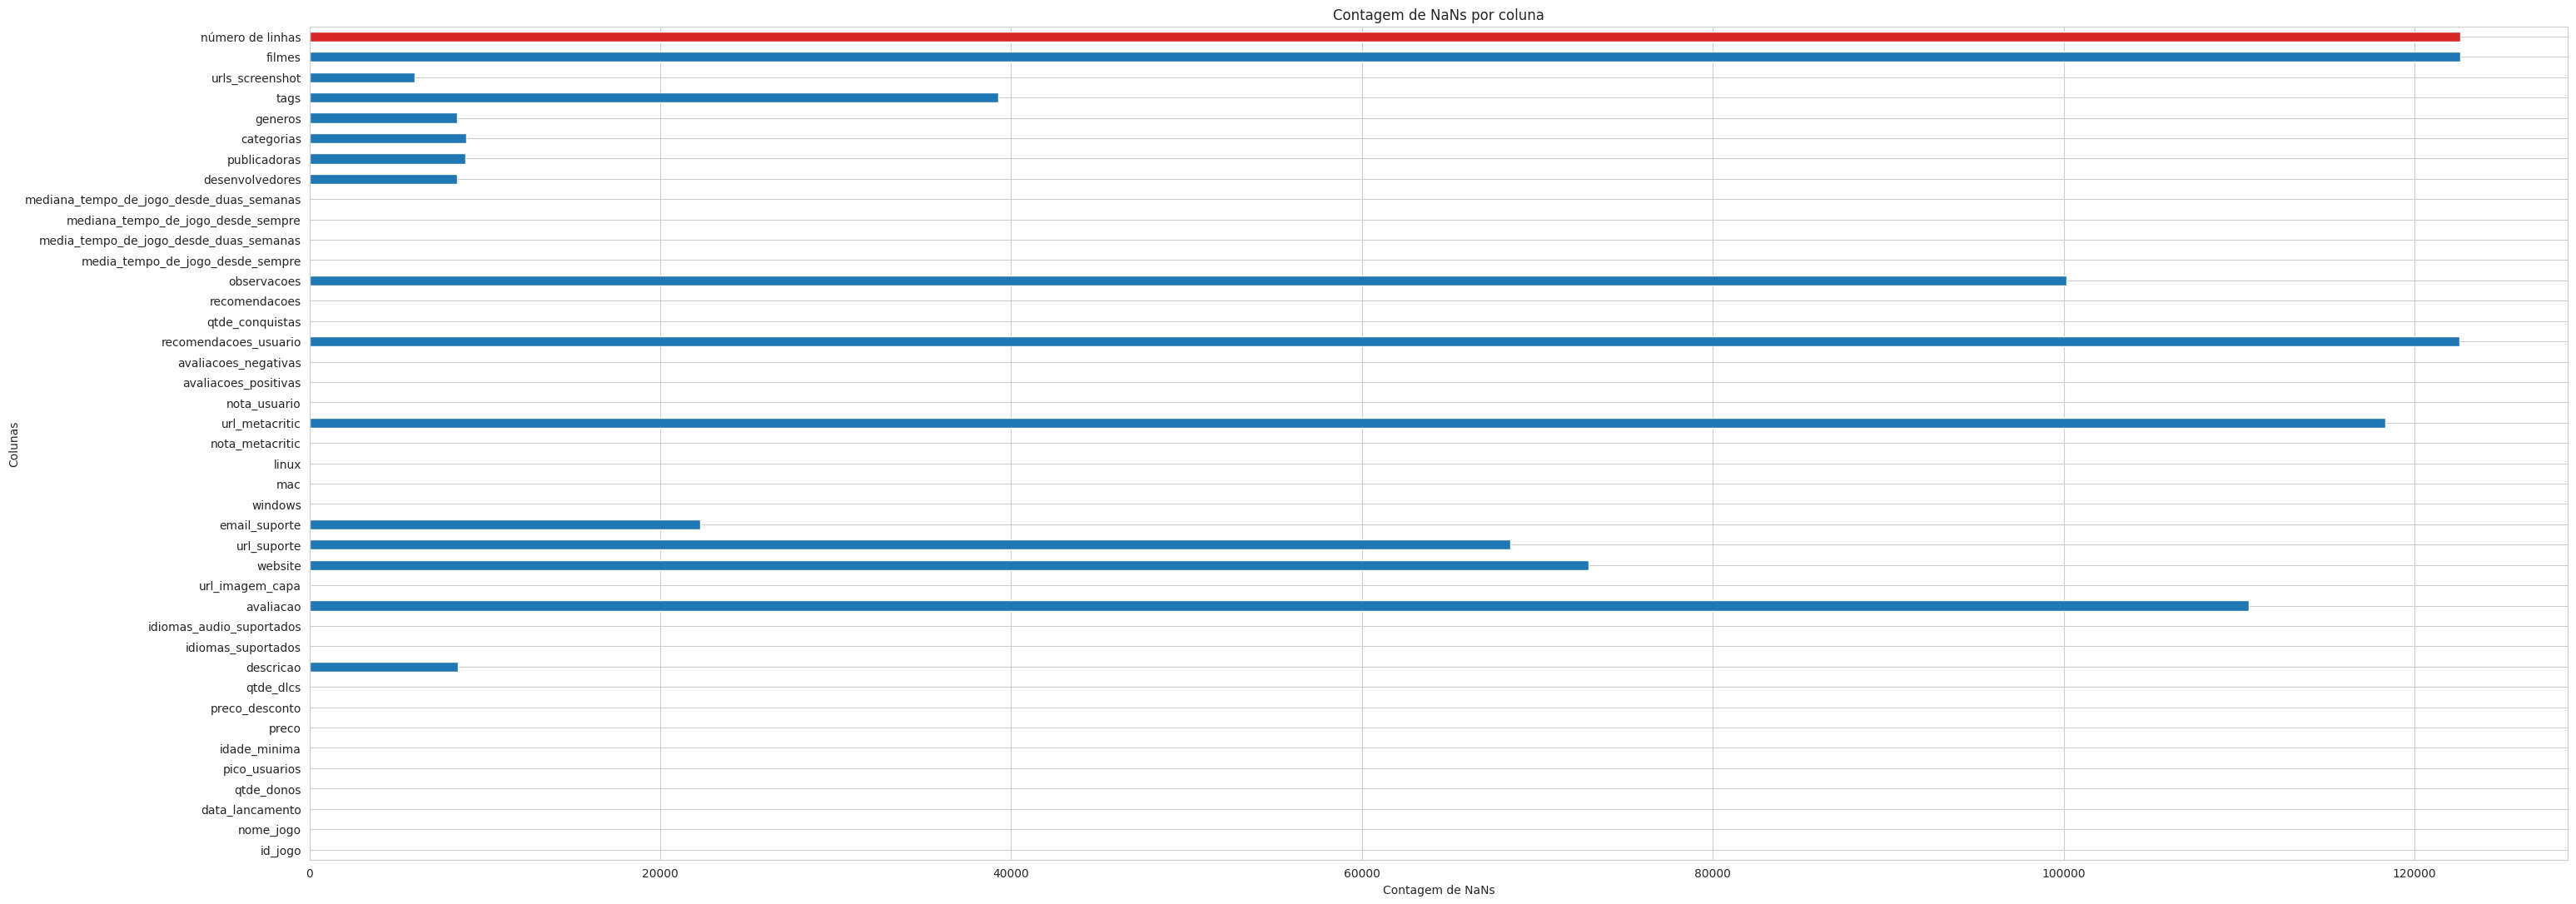

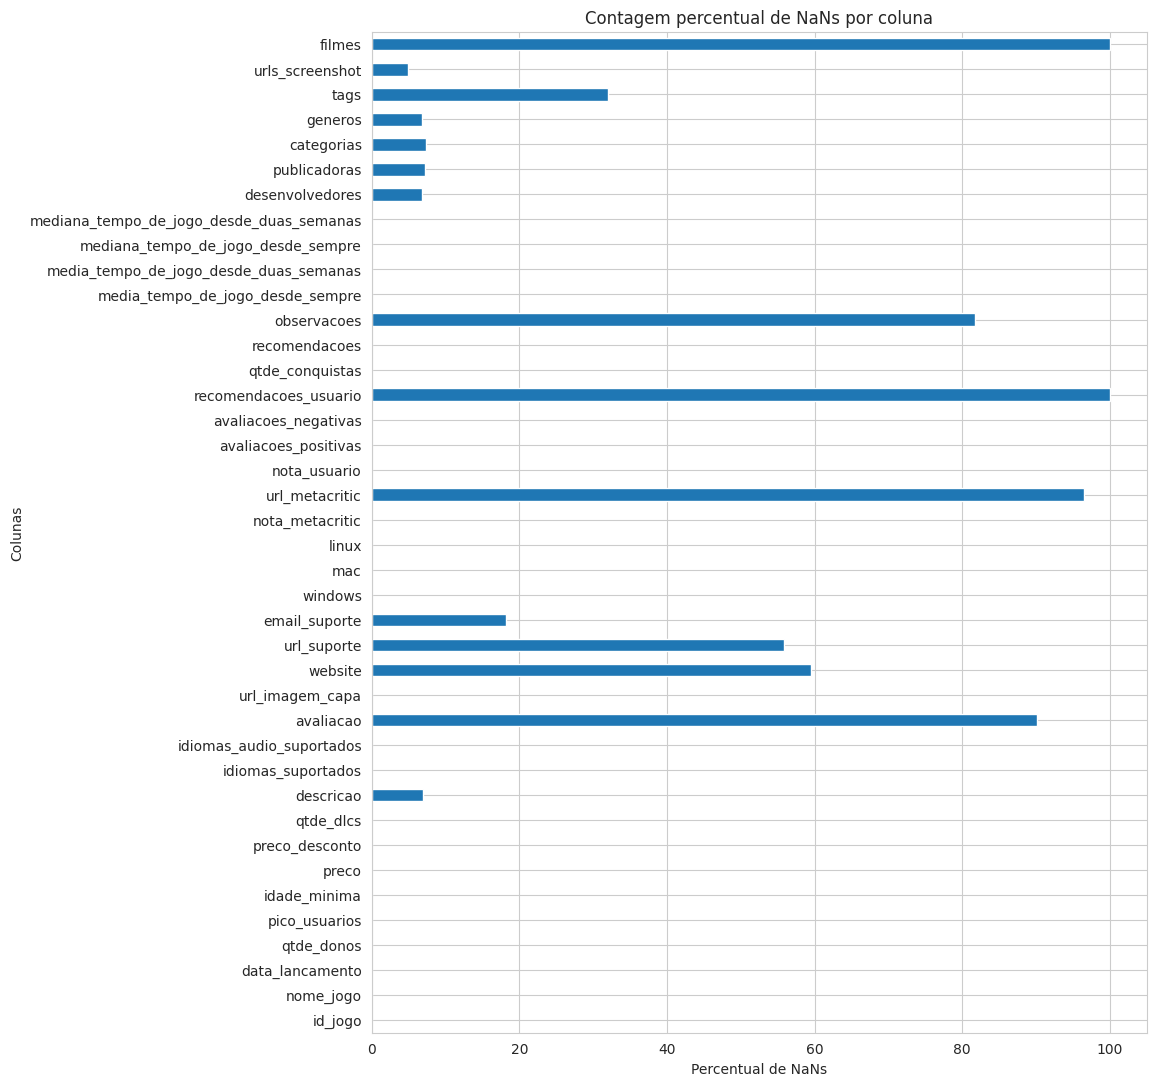

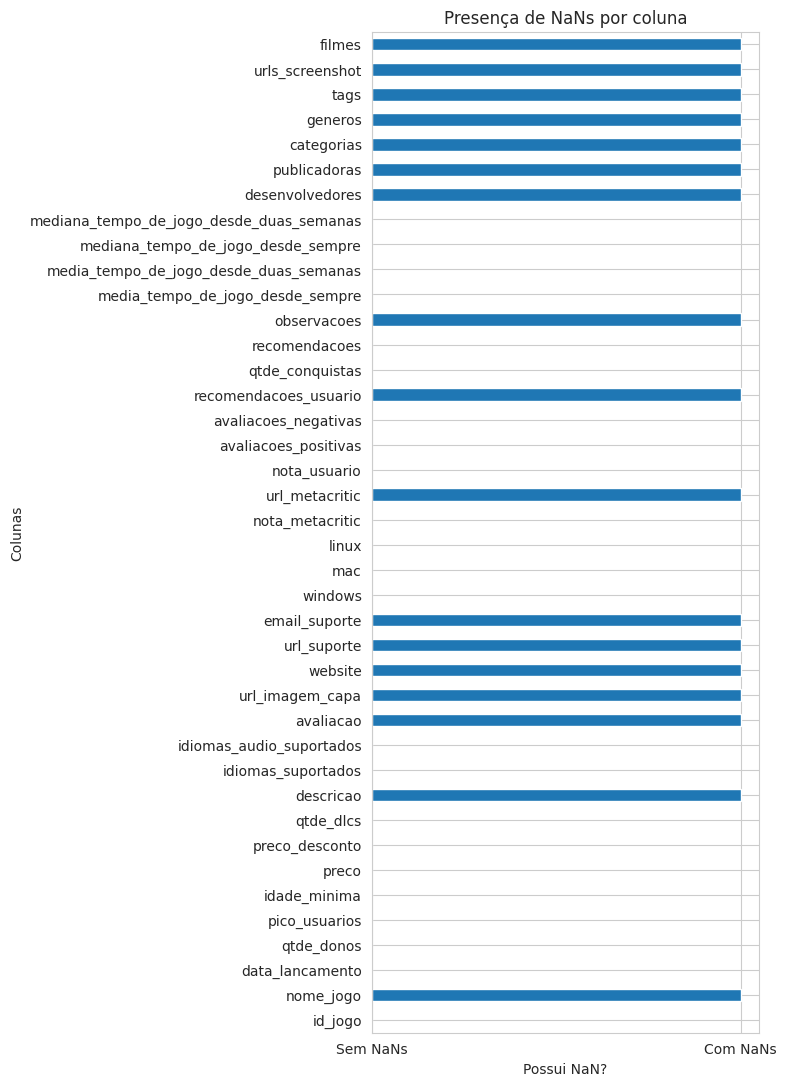

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

nan_count_df = df.isna().sum()

print(nan_count_df)

time.sleep(1)

nan_count_df["número de linhas"] = len(df)
colors = ["tab:red" if coluna == "número de linhas" else "tab:blue" for coluna in nan_count_df.index]
plt.figure(figsize=(35, 13))
nan_count_df.plot(kind="barh", color=colors)
plt.title("Contagem de NaNs por coluna")
plt.xlabel("Contagem de NaNs")
plt.ylabel("Colunas")
plt.show()

nan_percentage_df = (df.isna().sum() / len(df)) * 100
plt.figure(figsize=(10, 13))
nan_percentage_df.plot(kind="barh")
plt.title("Contagem percentual de NaNs por coluna")
plt.xlabel("Percentual de NaNs")
plt.ylabel("Colunas")
plt.show()


nan_percentage_df = df.isna().sum().apply(lambda x: 1 if x >= 1 else 0)
plt.figure(figsize=(5, 13))
nan_percentage_df.plot(kind="barh")
plt.xticks([0, 1], ['Sem NaNs', 'Com NaNs'])
plt.title("Presença de NaNs por coluna")
plt.xlabel("Possui NaN?")
plt.ylabel("Colunas")
plt.show()

Ao comparar ambas as tabelas de presença e contagem, perceba que há colunas que possuem pouquíssimos NaNs:
* "nome" só possui um.
* "imagem de capa" possui somente 81 NaNs de 122.611 linhas.

Já as colunas com muitas NaNs dificilmente podem ser usadas, por não possuírem dados suficientes. Aqui estabeleceu-se um critério de que colunas com mais de 50% de NaNs seriam inúteis. Portanto as colunas inúteis a serem removidas serão:
* "filmes"
* "observacoes"
* "recomendacoes_usuario"
* "url_metacritic"
* "url_suporte"
* "website"
* "avaliacao"

In [242]:
print(f"Número de colunas antes: {len(df.columns)}")
df = df.drop(columns=["filmes", "observacoes", "recomendacoes_usuario", "url_metacritic", "url_suporte", "website", "avaliacao"])
print(f"Número de colunas depois: {len(df.columns)}")

Número de colunas antes: 40
Número de colunas depois: 33


O resto das colunas com NaNs devem receber uma das seguintes opções de limpeza:
1. deduzir e completar o dado com o valor correto, quando possível;
2. trocar NaN por um valor nulo com base em seus tipos de dados;
3. retirar registros com NaN;

In [243]:
print(f"Número de linhas antes: {len(df)}")
df.dropna(subset=["nome_jogo"], inplace=True)
print(f"Número de linhas depois: {len(df)}")

#print(f"Número de NaNs: {df["descricao"].isna().sum()}")
print(f"Número de NaNs antes: {df.isna().sum().sum()}")
df.fillna({
    "descricao": "",
    "url_imagem_capa": "urls",
    "email_suporte": f"https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/{df["id_jogo"]}/header.jpg",
    "desenvolvedores": "",
    "publicadoras": "",
    "categorias": "",
    "generos": "",
    "tags": "",
    "urls_screenshot": "",
    }, inplace=True)
print(f"Número de NaNs depois: {df.isna().sum().sum()}")

Número de linhas antes: 122611
Número de linhas depois: 122610
Número de NaNs antes: 110780
Número de NaNs depois: 0


### Apagar células duplicadas

Se houverem células duplicadas, o código abaixo irá apagá-los. 

In [244]:
print("Número de duplicatas: ", df["id_jogo"].duplicated().sum())
print(f"Linhas após remover duplicatas: {df.shape[0]}")
df = df.drop_duplicates(subset=['id_jogo'], keep='first')
print(f"Linhas após remover duplicatas: {df.shape[0]}")

Número de duplicatas:  0
Linhas após remover duplicatas: 122610
Linhas após remover duplicatas: 122610


### Formatando colunas

O processo a seguir inclui a alteração dos formatos das colunas para formatos mais adequados de se trabalhar e a criação de novas colunas que facilitem análise posterior.

In [245]:
def classificar_tier_mercado(valor):
    if valor == 0:
        return 'Gratuito'
    elif valor < 10:
        return 'Budget (<$10)'
    elif valor < 30:
        return 'Indie / Padrão ($10-$29)'
    elif valor < 59: 
        return 'Double-A / Premium ($30-$58)'
    else:
        return 'AAA / Lançamento (+$59)'
        
df['ano_lancamento'] = pd.to_datetime(df['data_lancamento'], errors='coerce').dt.year
df['tier_preco'] = df['preco'].apply(classificar_tier_mercado)
df['tem_ptbr_interface'] = df['idiomas_suportados'].astype(str).str.contains('Portuguese - Brazil', case=False, regex=False)
df['tem_ptbr_audio'] = df['idiomas_audio_suportados'].astype(str).str.contains('Portuguese - Brazil', case=False, regex=False)

4 colunas foram geradas:
* ano_lançamento: extrai o ano da data de lançamento.
* tier_preco: classifica cada jogo com base no seu preço
* tem_ptbr_interface: True se tem português brasileiro em 'idiomas_suportados', False caso contrário.
* tem_ptbr_audio: True se tem português brasileiro em 'idiomas_audio_suportados', False caso contrário.

### Resultados após limpeza

In [246]:
print("---------------------------------------")
print("Total de jogos na base:", len(df))
print("---------------------------------------")
print("Total de colunas:", len(df.columns)) 
print("---------------------------------------")
print("Número de NaNs restantes: ", df.isna().sum().sum())
print("---------------------------------------")
print("Número de duplicatas restantes: ", df["id_jogo"].duplicated().sum())
print("---------------------------------------")

print(df.dtypes)

print("---------------------------------------")

df.head(5)

---------------------------------------
Total de jogos na base: 122610
---------------------------------------
Total de colunas: 37
---------------------------------------
Número de NaNs restantes:  0
---------------------------------------
Número de duplicatas restantes:  0
---------------------------------------
id_jogo                                       int64
nome_jogo                                    object
data_lancamento                              object
qtde_donos                                   object
pico_usuarios                                 int64
idade_minima                                  int64
preco                                       float64
preco_desconto                                int64
qtde_dlcs                                     int64
descricao                                    object
idiomas_suportados                           object
idiomas_audio_suportados                     object
url_imagem_capa                              object
email_su

,id_jogo,nome_jogo,data_lancamento,qtde_donos,pico_usuarios,idade_minima,preco,preco_desconto,qtde_dlcs,descricao,idiomas_suportados,idiomas_audio_suportados,url_imagem_capa,email_suporte,windows,mac,linux,nota_metacritic,nota_usuario,avaliacoes_positivas,avaliacoes_negativas,qtde_conquistas,recomendacoes,media_tempo_de_jogo_desde_sempre,media_tempo_de_jogo_desde_duas_semanas,mediana_tempo_de_jogo_desde_sempre,mediana_tempo_de_jogo_desde_duas_semanas,desenvolvedores,publicadoras,categorias,generos,tags,urls_screenshot,ano_lancamento,tier_preco,tem_ptbr_interface,tem_ptbr_audio
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,0,,[],[],https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...,True,False,False,0,0,0,0,0,0,0,0,0,0,,,,,,https://shared.akamai.steamstatic.com/store_it...,2023,Gratuito,False,False
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0 - 20000,0,0,5.24,65,0,"Springtime, April: when the cherry trees come ...",['English'],[],https://shared.akamai.steamstatic.com/store_it...,support@mangagamer.com,True,False,False,0,0,252,3,0,231,8,0,8,0,minori,MangaGamer,"Single-player,Steam Trading Cards,Steam Cloud,...",Adventure,"Adventure,Visual Novel,Anime,Cute",https://shared.akamai.steamstatic.com/store_it...,2016,Budget (<$10),False,False
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0 - 20000,0,0,4.99,0,0,"Immerse yourself in the most beloved, mystical...","['English', 'French', 'German', 'Russian']",[],https://shared.akamai.steamstatic.com/store_it...,support@8floor.net,True,True,False,0,0,21,3,0,0,0,0,0,0,Somer Games,8floor,"Single-player,Family Sharing",Casual,"Casual,Card Game,Solitaire,Puzzle,Hidden Objec...",https://shared.akamai.steamstatic.com/store_it...,2019,Budget (<$10),False,False
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0 - 20000,1,0,8.99,0,1,"synopsis 'Hello, I'm Hiyoro, a new YouTuber!' ...",['Korean'],['Korean'],https://shared.akamai.steamstatic.com/store_it...,yujingamesc@gmail.com,True,False,False,0,0,0,0,19,0,0,0,0,0,유진게임즈,유진게임즈,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Simulation",,https://shared.akamai.steamstatic.com/store_it...,2024,Budget (<$10),False,False
4,3631080,Maze Quest VR,"Apr 24, 2025",0 - 20000,0,0,4.99,0,0,Its not just a Maze; its a Quest! Enter the ca...,['English'],['English'],https://shared.akamai.steamstatic.com/store_it...,support@realityexpanded.com,True,False,False,0,0,0,0,0,0,0,0,0,0,Reality Expanded LLC,Reality Expanded LLC,"Single-player,VR Only,Steam Leaderboards,Famil...","Action,Early Access",,https://shared.akamai.steamstatic.com/store_it...,2025,Budget (<$10),False,False


## Análise

### Matriz de Valor: Preço vs. Qualidade (Metacritic)

Cruzamos o Preço (Eixo X) com a Nota da Crítica (Eixo Y) para identificar padrões de custo-benefício.
Dividimos o gráfico em quadrantes para facilitar a análise:
* **Jóias Escondidas (Topo Esquerdo):** Jogos baratos (<$30) com notas excelentes (>75). É onde a Steam brilha.
* **AAA / Premium (Topo Direito):** Jogos caros que entregam o que prometem.
* **Alerta de Risco (Canto Inferior Direito):** Jogos caros com notas baixas (preço não condiz com a entrega).

* **Insight:** A correlação é **fraca**. A linha de tendência quase plana indica que o preço é um péssimo indicador de qualidade. A maior concentração de jogos excelentes (notas 80-90) está, surpreendentemente, na faixa de **$10 a $30**, provando que o maior valor agregado da plataforma vem dos estúdios médios e independentes, e não necessariamente dos lançamentos de $70.

/tmp/ipykernel_2651/1476513311.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12, frameon=True, facecolor='white', framealpha=1)


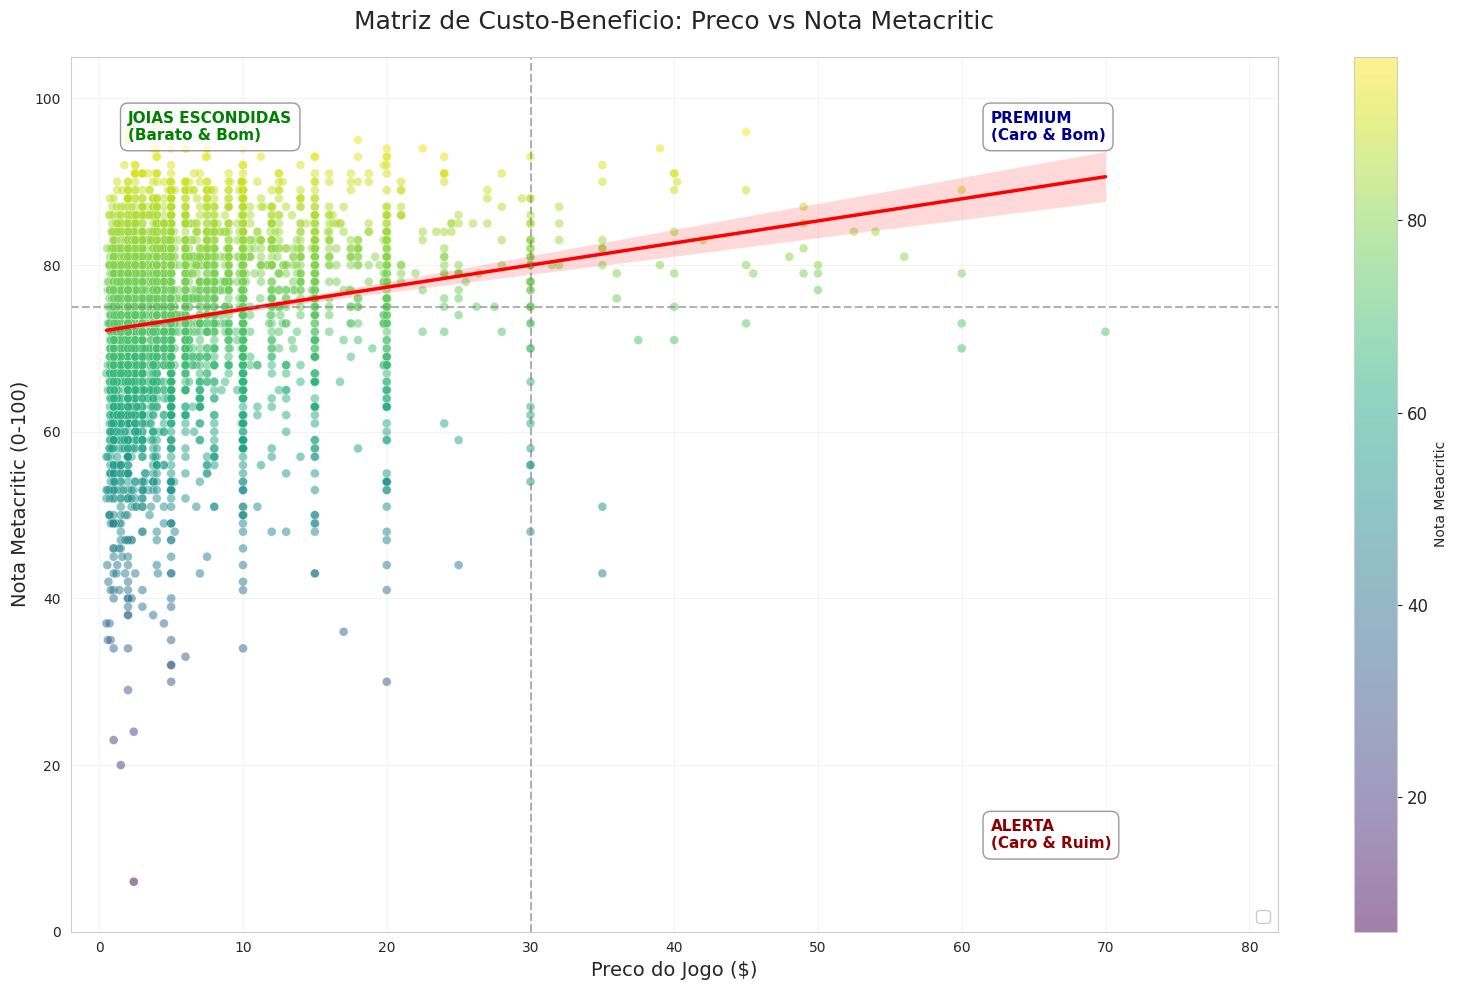

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

df_plot = df[
    (df['preco'] > 0) & 
    (df['preco'] <= 80) & 
    (df['nota_metacritic'] > 0)
]

corr = df_plot['preco'].corr(df_plot['nota_metacritic'])

scatter = plt.scatter(
    df_plot['preco'], 
    df_plot['nota_metacritic'], 
    alpha=0.5, 
    s=40,  
    c=df_plot['nota_metacritic'], 
    cmap='viridis', 
    edgecolor='white',
    linewidth=0.3
)

sns.regplot(data=df_plot, x='preco', y='nota_metacritic', 
            scatter=False, line_kws={'color':'red', 'linewidth':2.5, 'label':f'Tendencia (Corr: {corr:.2f})'})

plt.axvline(30, color='gray', linestyle='--', alpha=0.6)
plt.axhline(75, color='gray', linestyle='--', alpha=0.6)

estilo_texto = dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='gray')

plt.text(2, 95, "JOIAS ESCONDIDAS\n(Barato & Bom)", fontsize=11, fontweight='bold', color='green', bbox=estilo_texto)
plt.text(62, 95, "PREMIUM\n(Caro & Bom)", fontsize=11, fontweight='bold', color='darkblue', bbox=estilo_texto)
plt.text(62, 10, "ALERTA\n(Caro & Ruim)", fontsize=11, fontweight='bold', color='darkred', bbox=estilo_texto)

plt.xlim(-2, 82)
plt.ylim(0, 105)

plt.title('Matriz de Custo-Beneficio: Preco vs Nota Metacritic', fontsize=18, pad=20)
plt.xlabel('Preco do Jogo ($)', fontsize=14)
plt.ylabel('Nota Metacritic (0-100)', fontsize=14)

cbar = plt.colorbar(scatter, label='Nota Metacritic')
cbar.ax.tick_params(labelsize=12)

plt.legend(loc='lower right', fontsize=12, frameon=True, facecolor='white', framealpha=1)
plt.grid(True, alpha=0.2)
plt.tight_layout()

plt.show()

### Segmentação de Preços (USD)

**Nota Importante:** A base de dados utiliza preços em **Dólares Americanos ($)**.
Para a análise, categorizamos os jogos nos seguintes tiers comerciais:

* **1. Gratuito ($0):** Free-to-Play.
* **2. Budget (<$10):** Jogos casuais e promoções.
* **3. Indie / Padrão ($10-$29):** A faixa mais comum para grandes indies (ex: *Hades*, *Stardew Valley*).
* **4. Double-A / Premium ($30-$59):** Produções de médio orçamento ou grandes jogos em promoção (ex: *Palworld*, *Helldivers 2*).
* **5. AAA / Lançamento (+$59):** O teto da indústria. Grandes franquias e lançamentos de alto orçamento (ex: *Call of Duty*, *Starfield*).

* **Insight:** A distribuição mostra que a Steam é um ecossistema acessível. A esmagadora maioria dos títulos custa menos de $10. Jogos acima de $30 (AA e AAA) são a "elite" em termos de preço, representando uma fatia pequena do catálogo.

/tmp/ipykernel_2651/3296269167.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='tier_preco', order=ordem_tiers, palette='Spectral_r')


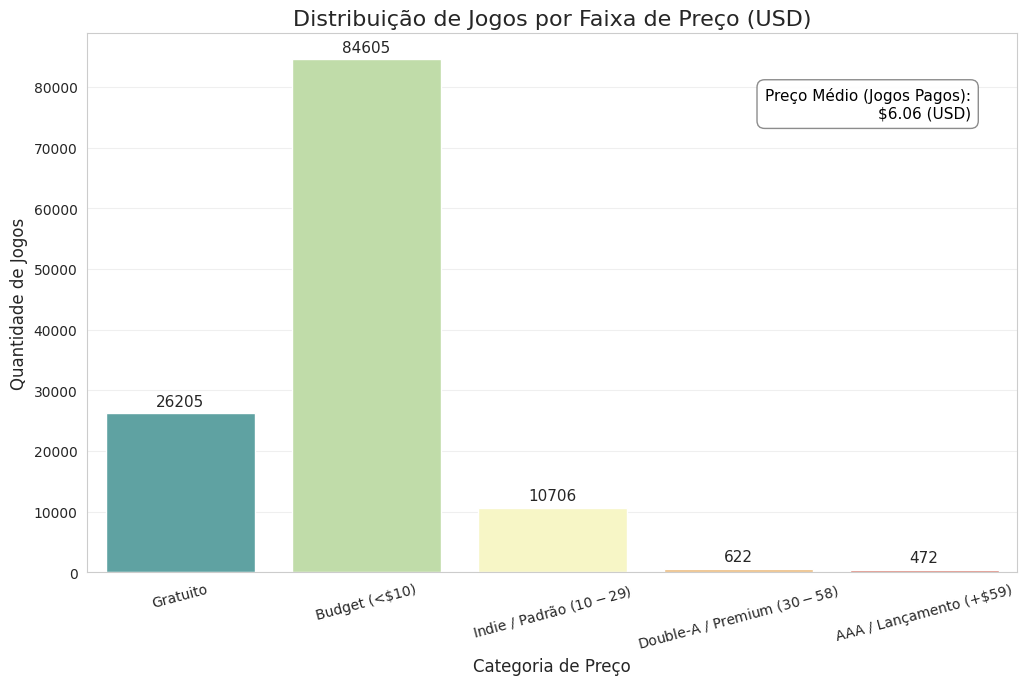

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

media_pagos = df[df['preco'] > 0]['preco'].mean()

plt.figure(figsize=(12, 7))

ordem_tiers = [
    'Gratuito', 
    'Budget (<$10)', 
    'Indie / Padrão ($10-$29)', 
    'Double-A / Premium ($30-$58)', 
    'AAA / Lançamento (+$59)'
]

ax = sns.countplot(data=df, x='tier_preco', order=ordem_tiers, palette='Spectral_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=11)

texto_info = f"Preço Médio (Jogos Pagos):\n${media_pagos:.2f} (USD)"
plt.text(0.95, 0.90, texto_info, transform=ax.transAxes, 
         fontsize=11, color='black', backgroundcolor='#f0f0f0',
         ha='right', va='top', bbox=dict(boxstyle="round,pad=0.5", facecolor='white', edgecolor='gray', alpha=0.9))

plt.title("Distribuição de Jogos por Faixa de Preço (USD)", fontsize=16)
plt.xlabel("Categoria de Preço", fontsize=12)
plt.ylabel("Quantidade de Jogos", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

plt.show()

### Volume de Lançamentos: A Explosão da Steam

Analisamos o volume exato de "entradas" (novos lançamentos) anuais.
* **Fase de Curadoria (2003-2012):** Volumes ínfimos (menos de 300 jogos/ano).
* **Fase Greenlight (2012-2017):** O volume começa a escalar, passando de 1.000 jogos/ano.
* **Fase Steam Direct (2017-2025):** Crescimento massivo. A barreira de entrada caiu, resultando em um mercado saturado onde mais de 10.000 jogos são lançados anualmente.

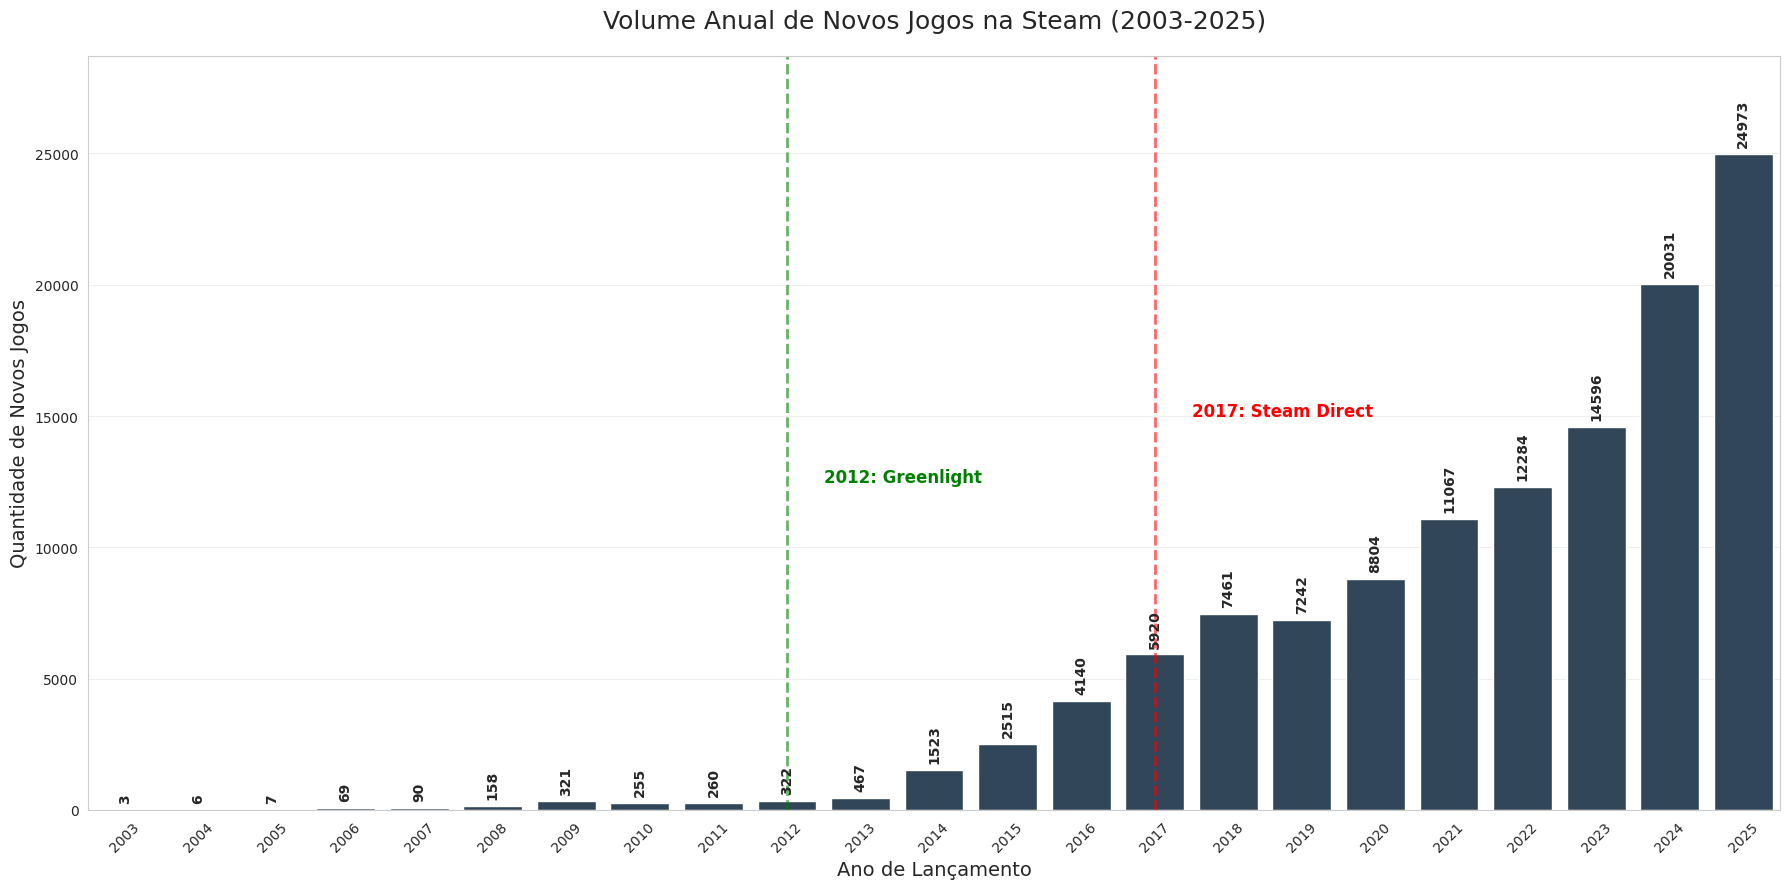

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

jogos_por_ano = df['ano_lancamento'].value_counts().sort_index()

jogos_por_ano = jogos_por_ano[(jogos_por_ano.index >= 2003) & (jogos_por_ano.index <= 2025)]

plt.figure(figsize=(18, 9)) # Aumentei um pouco para caber os números

ax = sns.barplot(x=jogos_por_ano.index.astype(int), y=jogos_por_ano.values, color='#2a475e')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, rotation=90, fontsize=10, fontweight='bold')

anos_lista = jogos_por_ano.index.tolist()

if 2012 in anos_lista:
    idx_2012 = anos_lista.index(2012)
    plt.axvline(x=idx_2012, color='green', linestyle='--', alpha=0.6, linewidth=2)
    # Ajustei a altura do texto para não bater nos números das barras
    plt.text(idx_2012 + 0.5, jogos_por_ano.max()*0.5, '2012: Greenlight', color='green', fontweight='bold', fontsize=12)

if 2017 in anos_lista:
    idx_2017 = anos_lista.index(2017)
    plt.axvline(x=idx_2017, color='red', linestyle='--', alpha=0.6, linewidth=2)
    plt.text(idx_2017 + 0.5, jogos_por_ano.max()*0.6, '2017: Steam Direct', color='red', fontweight='bold', fontsize=12)

plt.title("Volume Anual de Novos Jogos na Steam (2003-2025)", fontsize=18, pad=20)
plt.xlabel("Ano de Lançamento", fontsize=14)
plt.ylabel("Quantidade de Novos Jogos", fontsize=14)
plt.xticks(rotation=45)


plt.ylim(0, jogos_por_ano.max() * 1.15) 

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### O DNA da Steam: Indies e Lobos Solitários

Analisamos duas dimensões dos jogos: **Gênero** (O que é o jogo) e **Categoria** (Como se joga).

* **1. A Revolução Indie (Gêneros):** O gráfico da esquerda confirma o domínio absoluto da categoria **Indie**, seguida por **Ação** e **Aventura**. A Steam não é uma loja de *Blockbusters*; é um ecossistema de criadores independentes.
* **2. A Força do Single-Player (Categorias):** O gráfico da direita derruba um mito. Apesar do *hype* da mídia em torno de jogos online competitivos (Battle Royales, MMOs), a esmagadora maioria dos jogos lançados na Steam foca na experiência **Single-player** (Um Jogador). O público da plataforma busca experiências narrativas e imersivas individuais.

/tmp/ipykernel_2651/1650751099.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(ax=axes[0], x=top_generos.values, y=top_generos.index, palette=cores_genero)
/tmp/ipykernel_2651/1650751099.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(ax=axes[1], x=top_categorias.values, y=top_categorias.index, palette=cores_categoria)


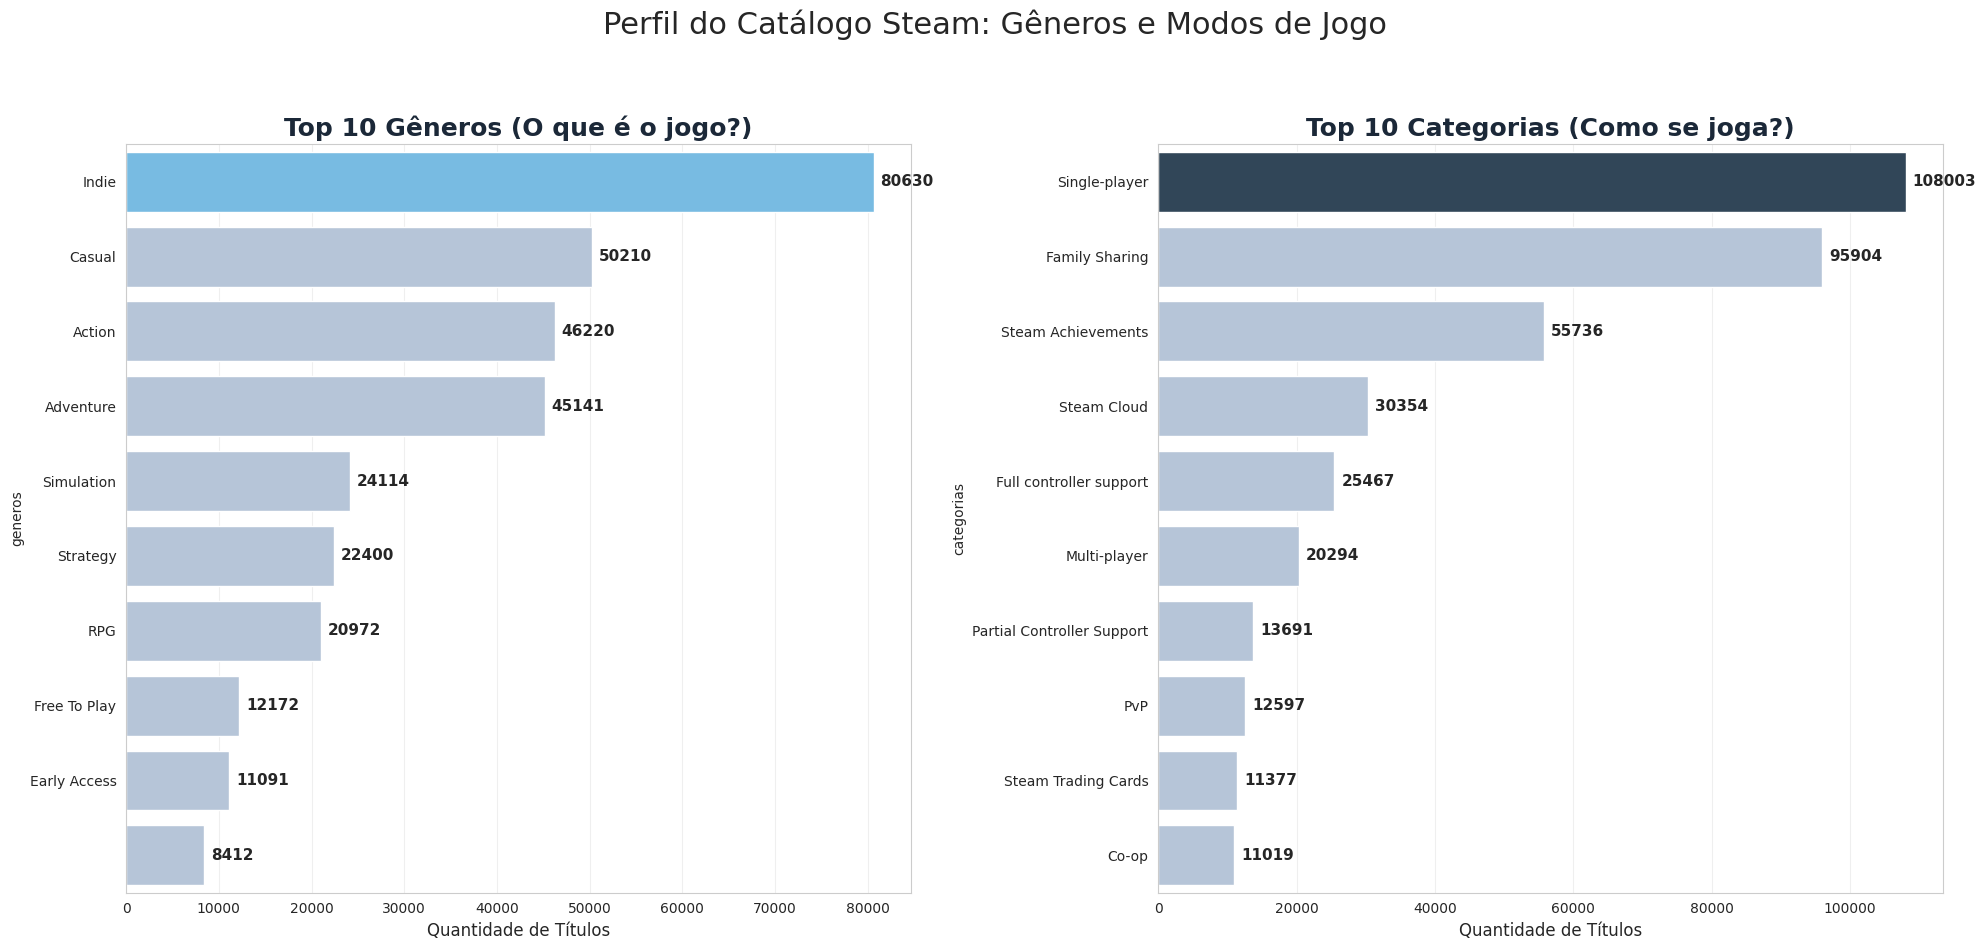

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")

def preparar_ranking(df, coluna, qtd=10):
    ranking = df[coluna].dropna().astype(str).str.split(',').explode().str.strip().value_counts().head(qtd)
    return ranking

top_generos = preparar_ranking(df, 'generos', 10)
top_categorias = preparar_ranking(df, 'categorias', 10)

fig, axes = plt.subplots(1, 2, figsize=(20, 9)) # Canvas largo e alto

cores_genero = ['#66c0f4' if x == top_generos.max() else '#b0c4de' for x in top_generos.values]

ax1 = sns.barplot(ax=axes[0], x=top_generos.values, y=top_generos.index, palette=cores_genero)

axes[0].set_title('Top 10 Gêneros (O que é o jogo?)', fontsize=18, fontweight='bold', color='#1b2838')
axes[0].set_xlabel('Quantidade de Títulos', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=5, fontsize=11, fontweight='bold')


cores_categoria = ['#2a475e' if x == top_categorias.max() else '#b0c4de' for x in top_categorias.values]

ax2 = sns.barplot(ax=axes[1], x=top_categorias.values, y=top_categorias.index, palette=cores_categoria)

axes[1].set_title('Top 10 Categorias (Como se joga?)', fontsize=18, fontweight='bold', color='#1b2838')
axes[1].set_xlabel('Quantidade de Títulos', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', padding=5, fontsize=11, fontweight='bold')

plt.suptitle("Perfil do Catálogo Steam: Gêneros e Modos de Jogo", fontsize=22, y=1.05)
plt.tight_layout()
plt.show()

### Acessibilidade: O Mercado Brasileiro

Analisamos a quantidade exata de jogos traduzidos.
* **Interface e Legendas:** Uma fatia considerável do mercado já traduz menus e textos para PT-BR. Isso mostra que as empresas reconhecem o Brasil como um consumidor de textos.
* **Dublagem (Áudio):** Aqui vemos a verdadeira barreira. A quantidade de jogos dublados é ínfima comparada ao total. Dublagem é cara e geralmente reservada apenas para grandes produções (AAA) que esperam retorno massivo no país.

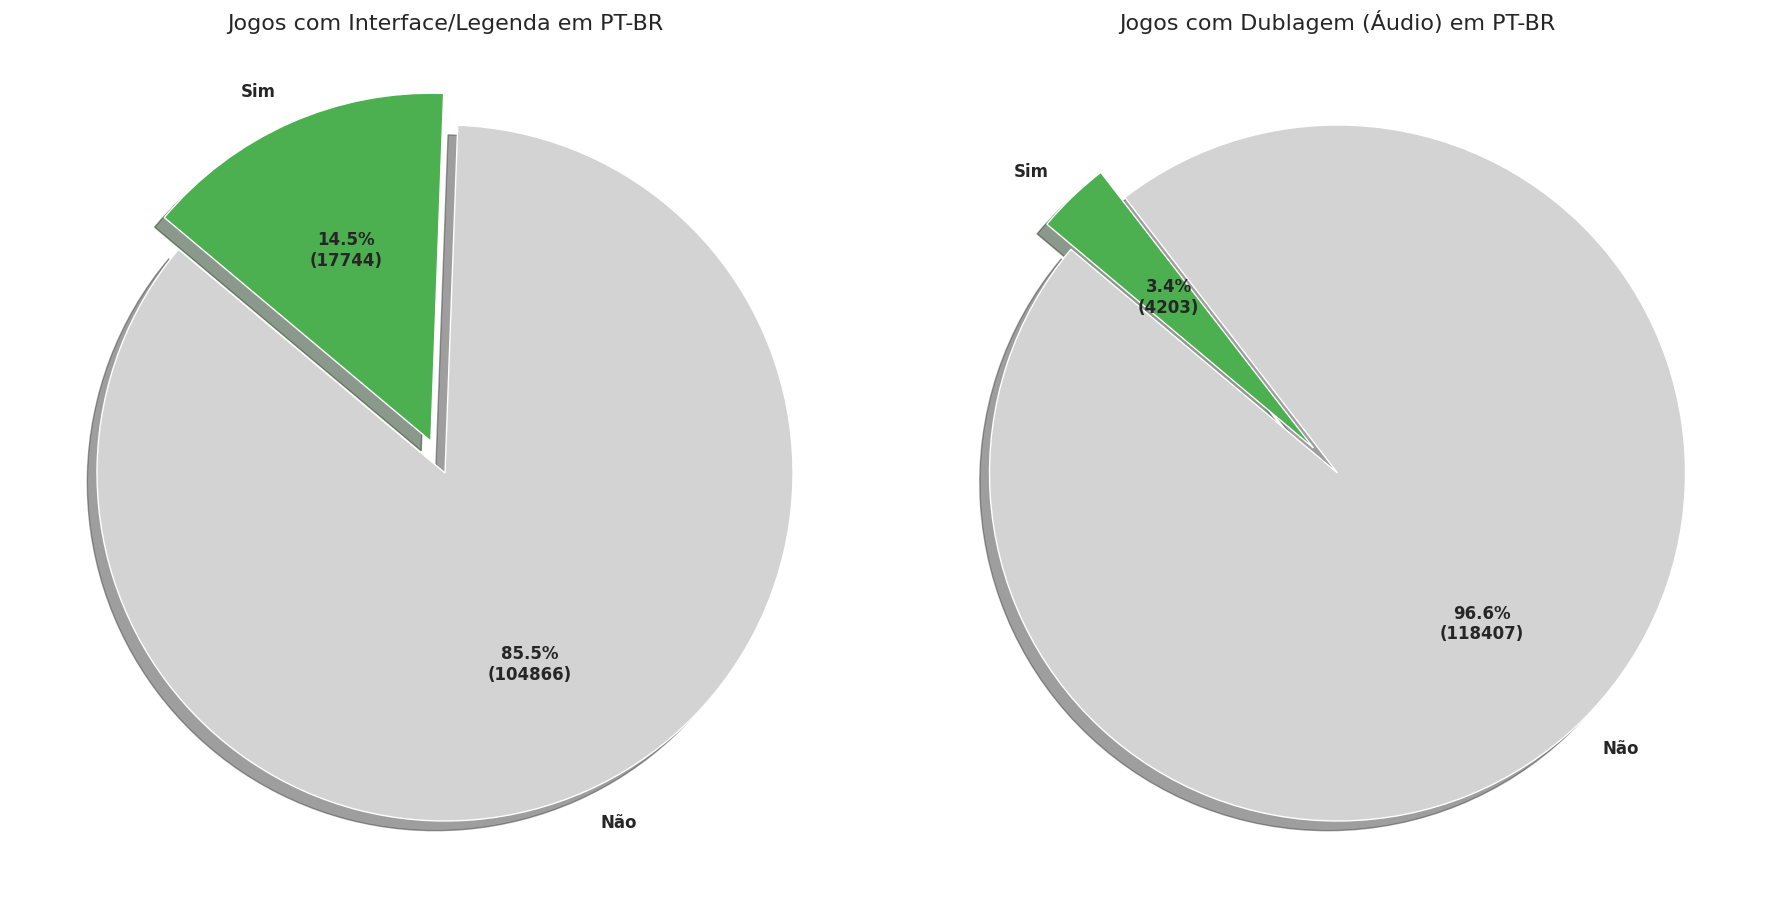

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")

def formatar_pizza(pct, todos_valores):
    absoluto = int(np.round(pct/100.*np.sum(todos_valores)))
    return f"{pct:.1f}%\n({absoluto})"

contagem_interface = df['tem_ptbr_interface'].value_counts().sort_index()
contagem_audio = df['tem_ptbr_audio'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 9))

cores = ['lightgray', '#4CAF50'] # Cinza para Não, Verde para Sim

axes[0].pie(contagem_interface, labels=['Não', 'Sim'], colors=cores, 
            autopct=lambda pct: formatar_pizza(pct, contagem_interface), 
            startangle=140, explode=(0, 0.1), shadow=True, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Jogos com Interface/Legenda em PT-BR', fontsize=16)

axes[1].pie(contagem_audio, labels=['Não', 'Sim'], colors=cores, 
            autopct=lambda pct: formatar_pizza(pct, contagem_audio), 
            startangle=140, explode=(0, 0.1), shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Jogos com Dublagem (Áudio) em PT-BR', fontsize=16)

plt.tight_layout()
plt.show()

# Conclusão e Próximos Passos (Pipeline)

Esta Análise Exploratória (EDA) na camada **Raw** nos permitiu entender a natureza dos dados e definir as regras de negócio para a limpeza.

**Principais Descobertas que guiarão o ETL (Raw -> Silver):**
1.  **Preços:** O campo vem como texto (ex: "Free to Play"). No ETL, criaremos uma função para padronizar tudo para numérico ($0.00).
2.  **Datas:** Existem formatos variados. Precisaremos converter para `datetime` padrão do banco SQL.
3.  **Colunas Complexas:** Gêneros e Categorias vêm agrupados por vírgula. Na camada Silver, manteremos assim, mas para o Dashboard (Gold) poderemos explodir essas colunas para filtros dinâmicos.
4.  **Qualidade:** Identificamos que preço não define qualidade, então manteremos ambas as métricas (Preço e Nota) para cruzamentos futuros.

**Próxima Etapa:** Executar o script de ETL para limpar esses dados e carregá-los na tabela `tb_games_silver` no PostgreSQL.